In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**importing and insepecting data**

In [2]:
startups = pd.read_excel('startup-expansion.xlsx')
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [4]:
startups[['Marketing Spend','Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


**Preprocessing Data**

In [5]:
startups['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [6]:
startups['City'].nunique()

149

In [7]:
startups['City'].value_counts()

City
Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: count, Length: 149, dtype: int64

In [8]:
startups['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [9]:
startups['State'].nunique() # nbr te3houm

35

In [10]:
startups['State'].value_counts()

State
California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: count, dtype: int64

In [11]:
startups['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [12]:
startups['Sales Region'].value_counts()

Sales Region
Region 2    86
Region 1    64
Name: count, dtype: int64

In [13]:
startups['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

In [14]:
startups['New Expansion'].value_counts()

New Expansion
Old    140
New     10
Name: count, dtype: int64

In [15]:
startups.isnull().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [16]:
startups.duplicated().sum()

0

<Axes: xlabel='Sales Region'>

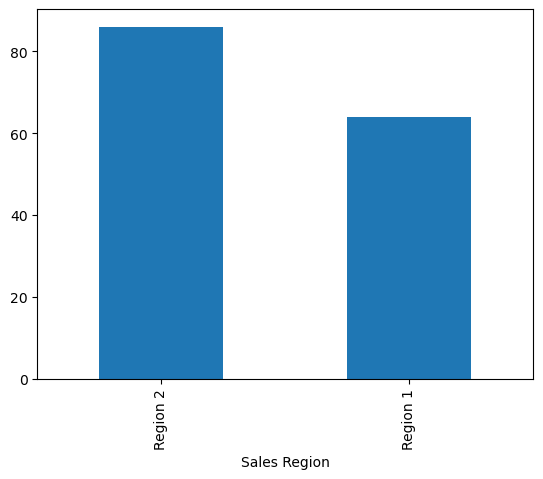

In [17]:
startups['Sales Region'].value_counts().plot.bar()

In [23]:
startups[startups['New Expansion']== 'New'].groupby('State').sum()['Revenue'].nlargest(10)

State
California    141883
Illinois       91692
Texas          85605
Tennessee      55357
Arizona        48954
New Jersey     34603
Name: Revenue, dtype: int64

In [25]:
startups[startups['New Expansion']== 'Old'].groupby('State').sum()['Revenue'].nlargest(10)

State
California     1362468
Texas           554964
Florida         479023
Washington      298013
Alabama         221025
New York        160046
Connecticut     158511
Georgia         157656
Colorado        156495
Michigan        147759
Name: Revenue, dtype: int64

In [28]:
startups['Profit'] = startups["Revenue"] - startups['Marketing Spend']
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018
...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729
148,149,College Station,Texas,Region 2,New,2994,22457,19463


In [31]:
startups["ROMS"] = round((startups['Profit'] / startups['Marketing Spend']) * 100,2)
# Return of marketing spend = li hiya rej3tlk meli sraftou ha ch3al

In [32]:
startups['ROMS%'] = startups["ROMS"] / 100

In [33]:
startups['ROMS'] / startups["Marketing Spend"]

0      0.680085
1      0.577715
2      0.610639
3      0.466691
4      0.692708
         ...   
145    0.638485
146    0.440356
147    0.580853
148    0.217124
149    0.638095
Length: 150, dtype: float64

In [34]:
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738
...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.3723
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.1831
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.3810
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07,6.5007


In [35]:
startups.to_csv('startup-expansion-modified.csv')